### Pivot Tables
It takes simple column-wise data as input and groups the entries into a two-dimensional table that provides a mutlidimensional summarization of the data.The differnce between pivot tables and groupby can sometimes cause confusion; it helps me to think of pivot tables as essentially a multi-dimensional version of GroupBy aggregation.That is, you split-apply-combine but both split and combine happen accross not a one -dimensional index but across a two dimensional grid

### Motivating Pivot Tables


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot Tables by Hand
we might begin by grouping according to gender, survival status, or some combination thereof.

In [3]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


This immediately gives us some insight: overall, three of every four females on board survived, while only one in five males survived!
now lets check group for class,gender and select surival and apply mean then combine the  resulting groups and then unstack hierarichal index to reveal the hidden multi dimensionality

In [5]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

C:\Users\Welcome\AppData\Local\Temp\ipykernel_11204\602533180.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This two-dimensional GroupBy is common enough that Pandas includes a convenience routine, pivot_table, which succinctly handles this type of multi-dimensional aggregation.

### Pivot Table Syntax


In [6]:
titanic.pivot_table('survived',index='sex',columns='class')

C:\Users\Welcome\AppData\Local\Temp\ipykernel_11204\2898336777.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived',index='sex',columns='class')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447



This is eminently more readable than the groupby approach, and produces the same result

### Multi-level pivot tables


In [8]:
age=pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

C:\Users\Welcome\AppData\Local\Temp\ipykernel_11204\2337545788.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived',['sex',age],'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [9]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

C:\Users\Welcome\AppData\Local\Temp\ipykernel_11204\3929073192.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], [fare, 'class'])


fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

The result is a four-dimensional aggregation with hierarchical indices

### Additional pivot table options


In [ ]:
# # call signature as of Pandas 0.18
# DataFrame.pivot_table(data, values=None, index=None, columns=None,
#                       aggfunc='mean', fill_value=None, margins=False,
#                       dropna=True, margins_name='All')

In [11]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

C:\Users\Welcome\AppData\Local\Temp\ipykernel_11204\392095072.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(index='sex', columns='class',
C:\Users\Welcome\AppData\Local\Temp\ipykernel_11204\392095072.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  titanic.pivot_table(index='sex', columns='class',


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [12]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)


C:\Users\Welcome\AppData\Local\Temp\ipykernel_11204\2200092740.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class', margins=True)


class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### Example: Birthrate Data

In [ ]:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 49  258k   49  128k    0     0   204k      0  0:00:01 --:--:--  0:00:01  205k
100  258k  100  258k    0     0   382k      0 --:--:-- --:--:-- --:--:--  384k


In [14]:
births = pd.read_csv('births.csv')

In [15]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [17]:
### add decade column to understand data a bit more about pivot table
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', aggfunc='sum', index='decade', columns='gender')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


we can see that male births outnumber female births in every decade

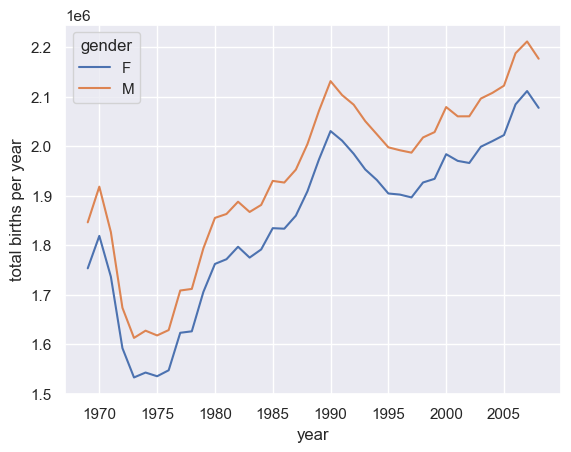

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

with simple pivot table and plot() method we can immediately see the annual trend in birth by gender

### Further data exploration
Though this doesn't necessarily relate to the pivot table, there are a few more interesting features we can pull out of this dataset using the Pandas tools covered up to this point. We must start by cleaning the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th). One easy way to remove these all at once is to cut outliers; we'll do this via a robust sigma-clipping operation:

In [19]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

With this we can use the query() method (discussed further in High-Performance Pandas: eval() and query()) to filter-out rows with births outside these values:

In [20]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')


In [21]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [22]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

C:\Users\Welcome\AppData\Local\Temp\ipykernel_11204\832003187.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


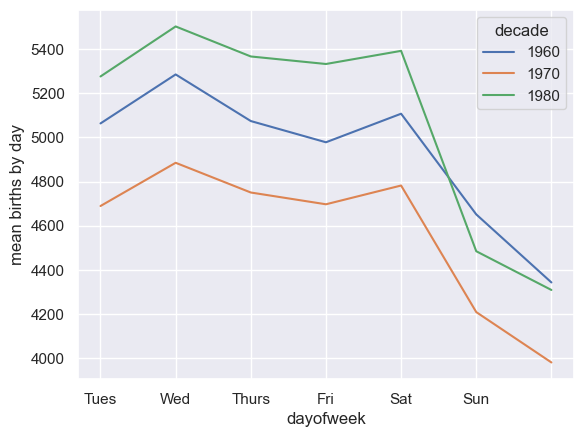

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

Another intersting view is to plot the mean number of births by the day of the year. Let's first group the data by month and day separately:

In [24]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

The result is a multi-index over months and days. To make this easily plottable, let's turn these months and days into a date by associating them with a dummy year variable (making sure to choose a leap year so February 29th is correctly handled!)

In [26]:
births_by_date.index = [pd.Timestamp(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year. From this, we can use the plot method to plot the data. It reveals some interesting trends:

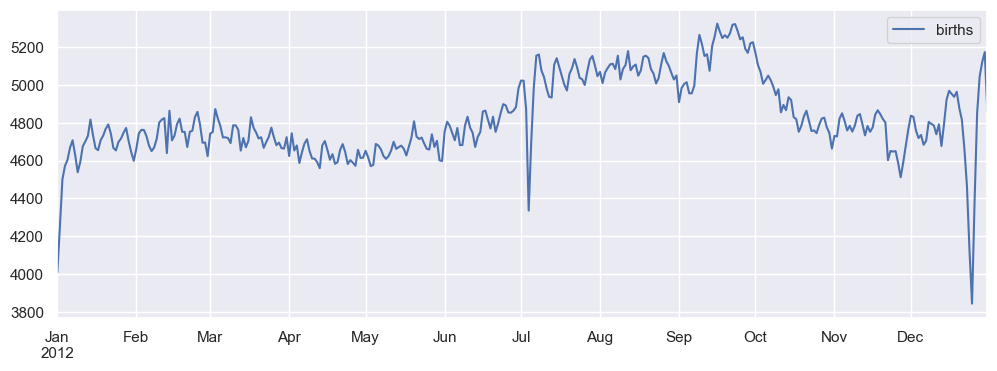

In [27]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In particular, the striking feature of this graph is the dip in birthrate on US holidays (e.g., Independence Day, Labor Day, Thanksgiving, Christmas, New Year's Day) although this likely reflects trends in scheduled/induced births rather than some deep psychosomatic effect on natural births

### Vectorized String Operations
#### Introducing Pandas String Operations


In [28]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

This vectorization of operations simplifies the syntax of operating on arrays of data: we no longer have to worry about the size or shape of the array, but just about what operation we want done. For arrays of strings, NumPy does not provide such simple access, and thus you're stuck using a more verbose loop syntax:

In [29]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

Pandas includes features to address both this need for vectorized string operations and for correctly handling missing data via the str attribute of Pandas Series and Index objects containing strings. So, for example, suppose we create a Pandas Series with this data:

In [30]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

In [31]:
### calll a single method that captialize all entries
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

### Tables of Pandas String Methods


In [32]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

### Methods Similar to Python String Methods

Nearly all of Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas `str` methods that mirror Python string methods:

|           |                |                |                |
|-----------|----------------|----------------|----------------|
|`len()`    | `lower()`      | `translate()`  | `islower()`    | 
|`ljust()`  | `upper()`      | `startswith()` | `isupper()`    | 
|`rjust()`  | `find()`       | `endswith()`   | `isnumeric()`  | 
|`center()` | `rfind()`      | `isalnum()`    | `isdecimal()`  | 
|`zfill()`  | `index()`      | `isalpha()`    | `split()`      | 
|`strip()`  | `rindex()`     | `isdigit()`    | `rsplit()`     | 
|`rstrip()` | `capitalize()` | `isspace()`    | `partition()`  | 
|`lstrip()` | `swapcase()`   | `istitle()`    | `rpartition()` |

Notice that these have various return values. Some, like `lower`, return a series of strings:

lower(), return a series of strings:

In [33]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [34]:
### returns length of each string
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [36]:
### return boolean values
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [37]:
### return lists or other compound values for each element
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Methods Using Regular Expressions

In addition, there are several methods that accept regular expressions (regexps) to examine the content of each string element, and follow some of the API conventions of Python's built-in `re` module:

| Method    | Description |
|-----------|-------------|
| `match`   | Calls `re.match` on each element, returning a Boolean. |
| `extract` | Calls `re.match` on each element, returning matched groups as strings.|
| `findall` | Calls `re.findall` on each element |
| `replace` | Replaces occurrences of pattern with some other string|
| `contains`| Calls `re.search` on each element, returning a boolean |
| `count`   | Counts occurrences of pattern|
| `split`   | Equivalent to `str.split`, but accepts regexps |
| `rsplit`  | Equivalent to `str.rsplit`, but accepts regexps |

With these, you can do a wide range of interesting operations. For example, we can extract the first name from each by asking for a contiguous group of characters at the beginning of each element:

In [38]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

Or we can do something more complicated, like finding all names that start and end with a consonant, making use of the start-of-string (^) and end-of-string ($) regular expression characters:

In [39]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

The ability to concisely apply regular expressions across Series or Dataframe entries opens up many possibilities for analysis and cleaning of data.

### Miscellaneous Methods
Finally, there are some miscellaneous methods that enable other convenient operations:

| Method | Description |
|--------|-------------|
| `get` | Indexes each element |
| `slice` | Slices each element|
| `slice_replace` | Replaces slice in each element with the passed value|
| `cat`      | Concatenates strings|
| `repeat` | Repeats values |
| `normalize` | Returns Unicode form of strings |
| `pad` | Adds whitespace to left, right, or both sides of strings|
| `wrap` | Splits long strings into lines with length less than a given width|
| `join` | Joins strings in each element of the `Series` with the passed separator|
| `get_dummies` | Extracts dummy variables as a `DataFrame` |

#### Vectorized item access and slicing

The `get` and `slice` operations, in particular, enable vectorized element access from each array.
For example, we can get a slice of the first three characters of each array using `str.slice(0, 3)`.
Note that this behavior is also available through Python's normal indexing syntax; for example, `df.str.slice(0, 3)` is equivalent to `df.str[0:3]`:

In [40]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

These get() and slice() methods also let you access elements of arrays returned by split(). For example, to extract the last name of each entry, we can combine split() and get():

In [ ]:
 
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

### Indicator variables
Another method that requires a bit of extra explanation is the get_dummies() method. This is useful when your data has a column containing some sort of coded indicator. For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam":

In [42]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [43]:
### get_dummies() routines lets you quickly split-out these indicator variables into a DataFrame of dummy variables:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


With these operations as building blocks, you can construct an endless range of string processing procedures when cleaning your data.

#### Example: Recipe Database
These vectorized string operations become most useful in the process of cleaning up messy, real-world data. Here I'll walk through an example of that, using an open recipe database compiled from various sources on the Web. Our goal will be to parse the recipe data into ingredient lists, so we can quickly find a recipe based on some ingredients we have on hand.

In [ ]:
# !curl -O https://s3.amazonaws.com/openrecipes/20170107-061401-recipeitems.json.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 29.3M    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 29.3M    0  186k    0     0  96333      0  0:05:19  0:00:01  0:05:18 96369
  4 29.3M    4 1342k    0     0   475k      0  0:01:03  0:00:02  0:01:01  475k
  8 29.3M    8 2533k    0     0   628k      0  0:00:47  0:00:04  0:00:43  628k
  9 29.3M    9 2917k    0     0   593k      0  0:00:50  0:00:04  0:00:46  593k
 11 29.3M   11 3317k    0     0   549k      0  0:00:54  0:00:06  0:00:48  679k
 11 29.3M   11 3525k    0     0   510k      0  0:00:58  0:00:06  0:00:52  678k
 12 29.3M   12 3733k    0     0   472k      0  0:01:03  0:00:07  0:00:56  470k
 13 29.3M   13 3957k    0     0   441k      0  0:01:08  0:00:08  0:01:00  288k
 14 29.3M   14 4309k    0     0   438k      0  0:01

In [ ]:
# !gunzip recipeitems-latest.json.gz

'gunzip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# !gunzip recipeitems-latest.json.gz

In [62]:
try:
    recipes = pd.read_json('data.json')
except ValueError as e:
    print("ValueError:", e)


ValueError: Trailing data


In [63]:
with open('data.json') as f:
    line = f.readline()
pd.read_json(line).shape

C:\Users\Welcome\AppData\Local\Temp\ipykernel_11204\789017317.py:3: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_json(line).shape


(2, 12)

In [64]:
# read the entire file into a Python array
with open('data.json', 'r') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

C:\Users\Welcome\AppData\Local\Temp\ipykernel_11204\2026833888.py:8: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  recipes = pd.read_json(data_json)


In [65]:
recipes.shape

(173278, 17)

We see there are nearly 200,000 recipes, and 17 columns. Let's take a look at one row to see what we have:

In [66]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

There is a lot of information there, but much of it is in a very messy form, as is typical of data scraped from the Web. In particular, the ingredient list is in string format; we're going to have to carefully extract the information we're interested in. Let's start by taking a closer look at the ingredients

In [67]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617343
std         146.704308
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

The ingredient lists average 250 characters long, with a minimum of 0 and a maximum of nearly 10,000 characters!

Just out of curiousity, let's see which recipe has the longest ingredient list:

In [ ]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [69]:
### hoe many  receipes for breakfast food
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [70]:
### how many  receipes list cinnamon as a ingredient
recipes.ingredients.str.contains('[Cc]innamon').sum()

np.int64(10526)

We could even look to see whether any recipes misspell the ingredient as "cinamon":

In [71]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

np.int64(11)

#### A simple recipe recommender
Let's go a bit further, and start working on a simple recipe recommendation system: given a list of ingredients, find a recipe that uses all those ingredients. While conceptually straightforward, the task is complicated by the heterogeneity of the data: there is no easy operation, for example, to extract a clean list of ingredients from each row. So we will cheat a bit: we'll start with a list of common ingredients, and simply search to see whether they are in each recipe's ingredient list. For simplicity, let's just stick with herbs and spices for the time being:

In [72]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [73]:
import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                             for spice in spice_list))
spice_df.head()


,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [74]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

We find only 10 recipes with this combination; let's use the index returned by this selection to discover the names of the recipes that have this combination:

In [75]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

Now that we have narrowed down our recipe selection by a factor of almost 20,000, we are in a position to make a more informed decision about what we'd like to cook for dinner.